In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook
import load_raw as Raw
import seaborn as sns
from scipy.special import expit as logit

df_cleaned = pd.read_csv('/data/ortho/AllPatients.csv',  sep= ';')
#df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
#df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
#df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
#df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
#df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
#df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
#df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
#df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
#df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
#df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})

#df_cleaned = df_cleaned.values

# x is naar voren
# y is omhoog
# z is opzij
print(df_cleaned.Oorsprong)
#print(df_cleaned['Oorsprong'])

0          Cat3_pat38_meting2_oef6.csv
1          Cat3_pat38_meting2_oef6.csv
2          Cat3_pat38_meting2_oef6.csv
3          Cat3_pat38_meting2_oef6.csv
4          Cat3_pat38_meting2_oef6.csv
5          Cat3_pat38_meting2_oef6.csv
6          Cat3_pat38_meting2_oef6.csv
7          Cat3_pat38_meting2_oef6.csv
8          Cat3_pat38_meting2_oef6.csv
9          Cat3_pat38_meting2_oef6.csv
10         Cat3_pat38_meting2_oef6.csv
11         Cat3_pat38_meting2_oef6.csv
12         Cat3_pat38_meting2_oef6.csv
13         Cat3_pat38_meting2_oef6.csv
14         Cat3_pat38_meting2_oef6.csv
15         Cat3_pat38_meting2_oef6.csv
16         Cat3_pat38_meting2_oef6.csv
17         Cat3_pat38_meting2_oef6.csv
18         Cat3_pat38_meting2_oef6.csv
19         Cat3_pat38_meting2_oef6.csv
20         Cat3_pat38_meting2_oef6.csv
21         Cat3_pat38_meting2_oef6.csv
22         Cat3_pat38_meting2_oef6.csv
23         Cat3_pat38_meting2_oef6.csv
24         Cat3_pat38_meting2_oef6.csv
25         Cat3_pat38_met

In [2]:

df_cleaned['clavicula_x_dif'] = np.absolute(df_cleaned['clavicula_l_x'] - df_cleaned['clavicula_r_x'])
df_cleaned['clavicula_y_dif'] = np.absolute(df_cleaned['clavicula_l_y'] - df_cleaned['clavicula_r_y'])
df_cleaned['clavicula_z_dif'] = np.absolute(df_cleaned['clavicula_l_z'] - df_cleaned['clavicula_r_z'])

df_cleaned['scapula_x_dif'] = np.absolute(df_cleaned['scapula_l_x'] - df_cleaned['scapula_r_x'])
df_cleaned['scapula_y_dif'] = np.absolute(df_cleaned['scapula_l_y'] - df_cleaned['scapula_r_y'])
df_cleaned['scapula_z_dif'] = np.absolute(df_cleaned['scapula_l_z'] - df_cleaned['scapula_r_z'])

df_cleaned['humerus_x_dif'] = np.absolute(df_cleaned['humerus_l_x'] - df_cleaned['humerus_r_x'])
df_cleaned['humerus_y_dif'] = np.absolute(df_cleaned['humerus_l_y'] - df_cleaned['humerus_r_y'])
df_cleaned['humerus_z_dif'] = np.absolute(df_cleaned['humerus_l_z'] - df_cleaned['humerus_r_z'])


param = [ \
          'humerus_l_x', 'humerus_l_y', 'humerus_l_z', 'humerus_r_x', 'humerus_r_y', 'humerus_r_z', \
          'clavicula_l_x', 'clavicula_l_y', 'clavicula_l_z', 'clavicula_r_x', 'clavicula_r_y', 'clavicula_r_z', \
          'scapula_l_x', 'scapula_l_y', 'scapula_l_z', 'scapula_r_x', 'scapula_r_y', 'scapula_r_z', \
          'clavicula_x_dif','clavicula_y_dif','clavicula_z_dif', \
          'scapula_x_dif','scapula_y_dif','scapula_z_dif', \
          'humerus_x_dif', 'humerus_y_dif', 'humerus_z_dif'
         ]
#param = ['clavicula_x_dif','clavicula_y_dif']

df_cleaned['bias'] = 1

# split oorsprong kolom in onderdelen
x,y = df_cleaned['Oorsprong'].str.split(".").str
df_cleaned['cat'],df_cleaned['pat'],df_cleaned['meting'],df_cleaned['oef'] = x.str.split("_").str
df_cleaned['cat'] = [ int(x[3:]) for x in df_cleaned['cat']] 
df_cleaned['meting'] = [ int(x[6:]) for x in df_cleaned['meting']] 
df_cleaned['oef'] = [ int(x[3:]) for x in df_cleaned['oef']] 
df_cleaned['pat'] = [ int(x[3:]) for x in df_cleaned['pat']] 
# geef elke patient een uniek nummer
df_cleaned['pat'] = df_cleaned['cat']*1000+df_cleaned['pat']

df_cleaned['c4'] = ['Cat4' in vincent for vincent in df_cleaned['Oorsprong']]
df_cleaned['c3'] = ['Cat3' in vincent for vincent in df_cleaned['Oorsprong']]
df_cleaned['c2'] = ['Cat2' in vincent for vincent in df_cleaned['Oorsprong']]
df_cleaned['c1'] = ['Cat1' in vincent for vincent in df_cleaned['Oorsprong']]

tmp = ['bias']
tmp.extend(param)
df = df_cleaned[df_cleaned.index % 5 == 0]
X = np.matrix(df[tmp])
y = np.matrix(df[['c4']])

#print(df_cleaned[['Oorsprong','c4']])

<IPython.core.display.Javascript object>


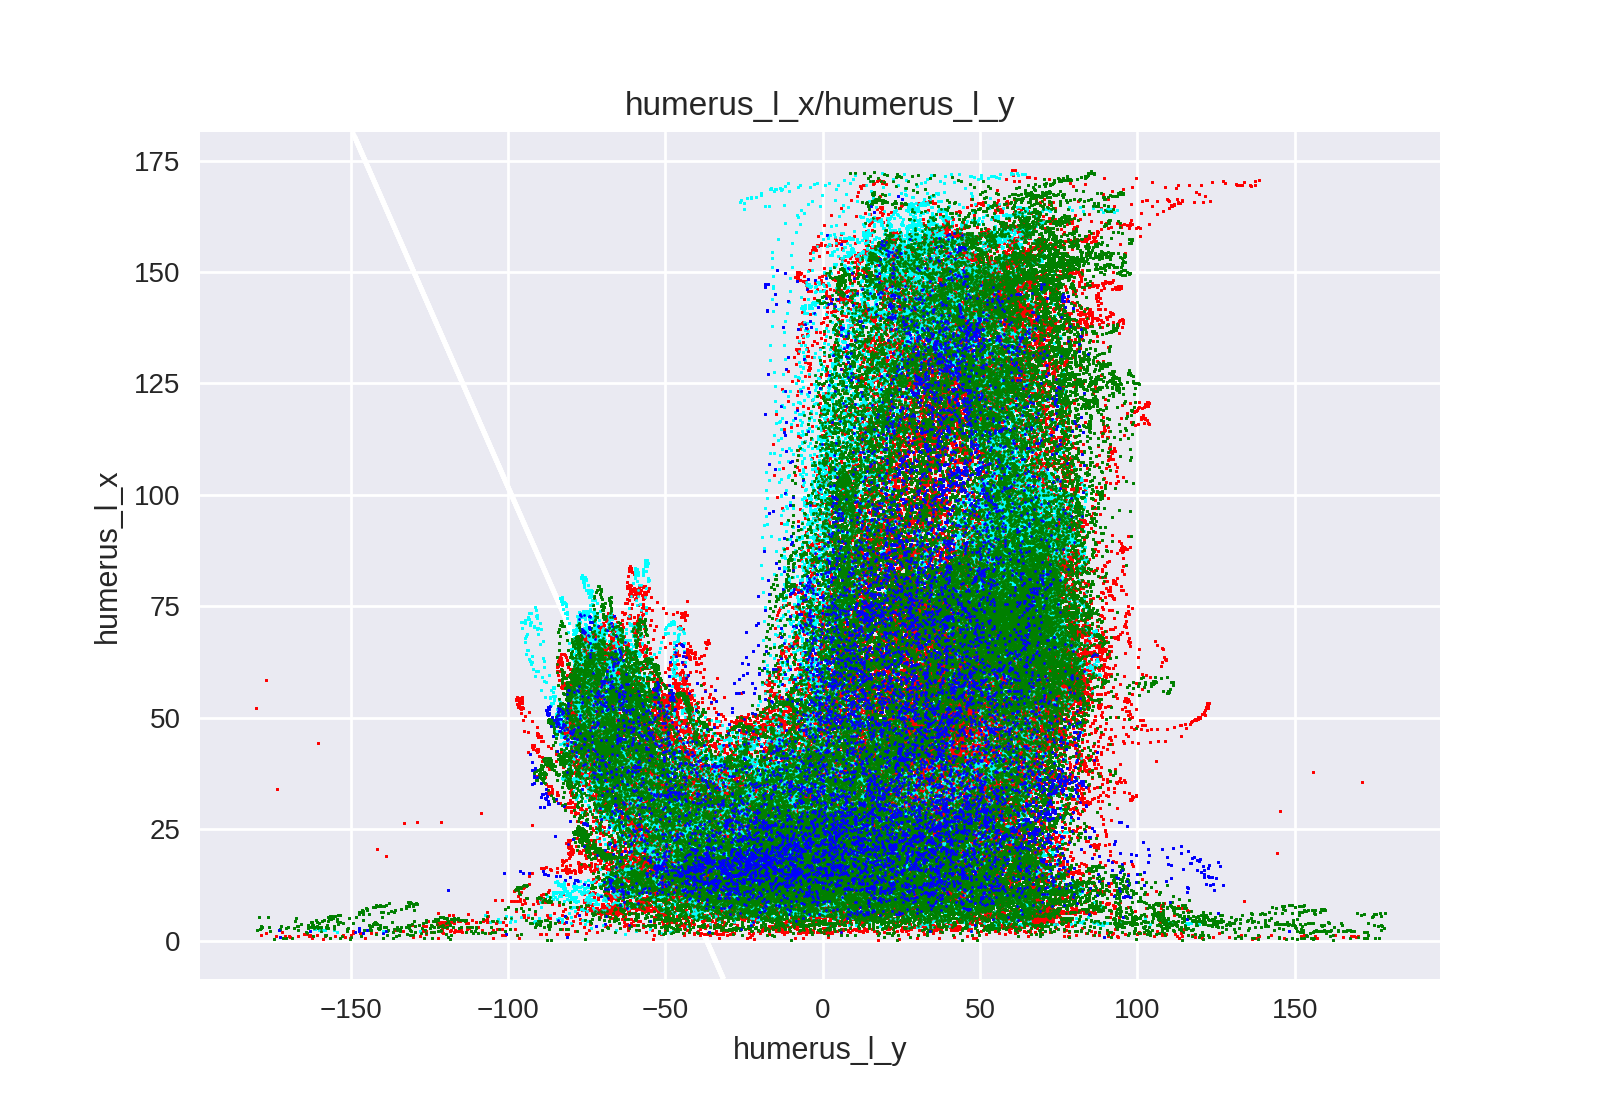

In [3]:
def scatter():
    cat4 = df_cleaned.where(df_cleaned['c4'])
    cat3 = df_cleaned.where(df_cleaned['c3'])
    cat2 = df_cleaned.where(df_cleaned['c2'])
    cat1 = df_cleaned.where(df_cleaned['c1'])
    
    
    param1 = param[0]
    param2 = param[1]
    #param1 = 'humerus_r_y'
    #param2 = 'scapula_r_y'
    
    plt.plot(cat3[param1], cat3[param2], '.', color='red', markersize=2)
    plt.plot(cat1[param1], cat1[param2], '.', color='cyan', markersize=2)
    plt.plot(cat2[param1], cat2[param2], '.', color='green', markersize=2)
    plt.plot(cat4[param1], cat4[param2], '.', color='blue', markersize=2)
    plt.title(param1+'/'+param2)
    plt.ylabel(param1)
    plt.xlabel(param2);

#    plt.plot(cat3[param[0]], cat3[param[1]], '.', color='red', markersize=2)
#    plt.plot(cat1[param[0]], cat1[param[1]], '.', color='cyan', markersize=2)
#    plt.plot(cat2[param[0]], cat2[param[1]], '.', color='green', markersize=2)
#    plt.plot(cat4[param[0]], cat4[param[1]], '.', color='blue', markersize=2)
#    plt.title(param[0]+'/'+param[1])
#    plt.ylabel(param[1])
#    plt.xlabel(param[0]);
    #plt.xlim(-4000,4000)
    #plt.ylim(-3500,3500)
scatter()



In [20]:
def logit(z):
    return 1.0 / (1.0 + np.exp(-z))

def h(X, theta):
    return logit(X * theta)

def predict(X, theta):
    return h(X, theta) >= 0.5

def fit_model(X, y, alpha=0.00001, iterations=50000):
    m = X.shape[1]            # het aantal coefficienten
    print(m)
    theta = np.zeros((m, 1))  # initialiseer theta
    for iter in range(iterations):
        theta -= (alpha / m) * X.T * ( h(X, theta) - y )
    return theta

def evaluate(theta, X, y):
    return sum( predict(X, theta) == y ) / len(X)

def plot_decision_boundary(theta):
    print(theta)
    print(theta.shape)
    print(type(theta))
    ax = plt.gca()
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    print(x_min,x_max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                         np.arange(y_min, y_max, 1))
#     print(xx, yy)
    X = np.matrix(np.vstack([np.ones(xx.shape[0] * xx.shape[1]), xx.ravel(), yy.ravel()])).T
    boundary = logit(X * theta)
    boundary = boundary.reshape(xx.shape)

    ax.contour(xx, yy,
           boundary,
           levels=[0.5])
    

In [5]:
%%time
theta = fit_model(X, y)
print(theta)


28
[[-1.19407759]
 [-0.03237638]
 [-0.02008537]
 [ 0.01372982]
 [ 0.00639415]
 [-0.19964787]
 [ 0.01640004]
 [-0.04030206]
 [ 0.0417269 ]
 [-0.00621656]
 [ 0.02134143]
 [-0.04257929]
 [-0.04477715]
 [-0.05541329]
 [ 0.20502164]
 [-0.02299482]
 [-0.00932344]
 [ 0.22434526]
 [ 0.13195535]
 [-0.06613131]
 [ 0.05742117]
 [ 0.00320292]
 [ 0.14487519]
 [ 0.04363494]
 [-0.14177903]
 [-0.05791646]
 [ 0.01531031]
 [ 0.02791175]]
CPU times: user 41min 20s, sys: 14.8 s, total: 41min 35s
Wall time: 1min 44s


In [6]:
evaluate(theta, X, y)

matrix([[0.95660416]])

In [21]:
scatter()
plot_decision_boundary(theta[0:3])

[[-1.19407759]
 [-0.03237638]
 [-0.02008537]]
(3, 1)
<class 'numpy.ndarray'>
-197.88221653408323 196.11778346591677


In [8]:
x = predict(X, theta)

#df['predict'] = x
#writer = pd.ExcelWriter('output.xlsx')
#df.to_excel(writer,'Sheet1')

TP = 0
for i in range(x.shape[0]):
    if x[i] == y[i] == True:
        TP = TP+1

TN = 0
for i in range(x.shape[0]):
    if x[i] == y[i] == False:
        TN = TN+1

FP = 0
for i in range(x.shape[0]):
    if (x[i] == True) and (y[i] == False):
        FP = FP+1

FN = 0
for i in range(x.shape[0]):
    if (x[i] == False) and (y[i] == True):
        FN = FN+1

tab = [["pred pos", TP, FP], ["pred neg", FN, TN]]
print(pd.DataFrame(tab, columns=["", "pos", "neg"]))
print()
print("recall", TP/(TP+FN))
print("precision", TP/(TP+FP))
print("accuracy", (TP+TN)/(TP+TN+FP+FN))


              pos    neg
0  pred pos   650    119
1  pred neg  1369  32151

recall 0.3219415552253591
precision 0.8452535760728218
accuracy 0.9566041587681181


In [9]:
## test set
df = df_cleaned[df_cleaned.index % 5 == 1] 
X2 = np.matrix(df[tmp])
y2 = np.matrix(df[['c4']])

x = predict(X2, theta)

#writer = pd.ExcelWriter('output.xlsx')

#df['predict'] = x
#df.to_excel(writer,'Sheet2')
#writer.save()

TP = 0
for i in range(x.shape[0]):
    if x[i] == y2[i] == True:
        TP = TP+1

TN = 0
for i in range(x.shape[0]):
    if x[i] == y2[i] == False:
        TN = TN+1

FP = 0
for i in range(x.shape[0]):
    if (x[i] == True) and (y2[i] == False):
        FP = FP+1

FN = 0
for i in range(x.shape[0]):
    if (x[i] == False) and (y2[i] == True):
        FN = FN+1

tab = [["pred pos", TP, FP], ["pred neg", FN, TN]]
print("resultaten op testset")
print(pd.DataFrame(tab, columns=["", "pos", "neg"]))
print()
print("recall", TP/(TP+FN))
print("precision", TP/(TP+FP))
print("accuracy", (TP+TN)/(TP+TN+FP+FN))


resultaten op testset
              pos    neg
0  pred pos   637    124
1  pred neg  1392  32135

recall 0.3139477575160177
precision 0.8370565045992115
accuracy 0.9557862809146057


In [10]:
# kolom met voorspelling toevoegen aan data
Xtmp = np.matrix(df_cleaned[tmp])
df_cleaned['predict'] = predict(Xtmp, theta)



In [11]:
## maak tabel (df4) met per patient het aantal sampels dat true en false gelabeld wordt.

# aantal false tellen
df2 = df_cleaned.groupby(['pat','predict']).size().to_frame('countF').reset_index()
df2 = df2.where(df2['predict'] == False).dropna()
df2 = df2.set_index('pat')

# aantal true tellen
df3 = df_cleaned.groupby(['pat','predict']).size().to_frame('countT').reset_index()
df3 = df3.where(df3['predict'] == True).dropna()
df3 = df3.set_index('pat')

# join df2 en df3
df4 = pd.concat([df2, df3], axis=1)
df4.drop(['predict','predict'], axis=1, inplace=True)
df4.fillna(0, inplace=True)
# print(df4)

In [12]:
df4['percentage'] = 100*df4['countT'] / (df4['countT'] + df4['countF'])
df4.sort_values(by=['percentage'],ascending=False).head(30)

,countF,countT,percentage
pat,,,
4006.0,356.0,569.0,61.513514
4023.0,423.0,653.0,60.687732
4014.0,625.0,424.0,40.419447
4015.0,530.0,219.0,29.238985
4012.0,724.0,297.0,29.089128
4011.0,539.0,218.0,28.797886
4020.0,1389.0,412.0,22.876180
4024.0,908.0,236.0,20.629371
4017.0,1402.0,199.0,12.429731


In [13]:
writer = pd.ExcelWriter('output.xlsx')

#df['predict'] = x
df4.to_excel(writer,'Sheet3')
writer.save()